<a href="https://colab.research.google.com/github/Pedro184294/EnergIA-Sustent-vel-Integra-o-Inteligente-de-Gera-o-Solar-Armazenamento-e-Automa-o-Residencial/blob/main/EnergIA_Sustent%C3%A1vel_Integra%C3%A7%C3%A3o_Inteligente_de_Gera%C3%A7%C3%A3o_Solar%2C_Armazenamento_e_Automa%C3%A7%C3%A3o_Residencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[00h] Clima: Nublado    | Geração: 0.00 kWh | Consumo: 1.70 kWh | Bateria: 3.30 kWh | Fonte: Bateria
[01h] Clima: Chuvoso    | Geração: 0.00 kWh | Consumo: 2.09 kWh | Bateria: 1.21 kWh | Fonte: Bateria
[02h] Clima: Chuvoso    | Geração: 0.00 kWh | Consumo: 2.15 kWh | Bateria: 0.00 kWh | Fonte: Rede
[03h] Clima: Ensolarado | Geração: 0.00 kWh | Consumo: 2.12 kWh | Bateria: 0.00 kWh | Fonte: Rede
[04h] Clima: Chuvoso    | Geração: 0.00 kWh | Consumo: 2.43 kWh | Bateria: 0.00 kWh | Fonte: Rede
[05h] Clima: Nublado    | Geração: 0.00 kWh | Consumo: 1.64 kWh | Bateria: 0.00 kWh | Fonte: Rede
[06h] Clima: Nublado    | Geração: 0.00 kWh | Consumo: 2.26 kWh | Bateria: 0.00 kWh | Fonte: Rede
[07h] Clima: Nublado    | Geração: 0.50 kWh | Consumo: 2.30 kWh | Bateria: 0.00 kWh | Fonte: Rede
[08h] Clima: Chuvoso    | Geração: 0.50 kWh | Consumo: 1.62 kWh | Bateria: 0.00 kWh | Fonte: Rede
[09h] Clima: Ensolarado | Geração: 2.50 kWh | Consumo: 1.89 kWh | Bateria: 0.61 kWh | Fonte: Solar
[10h] Clima: 

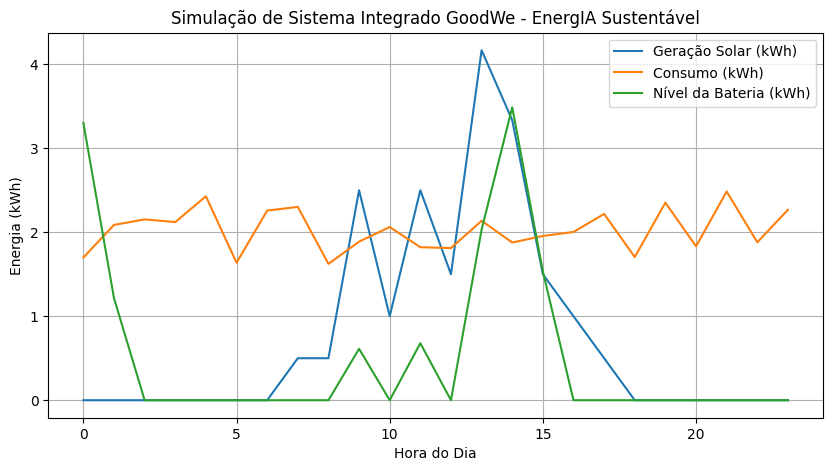

In [1]:
import time
import random
import matplotlib.pyplot as plt

# -----------------------------
# SIMULAÇÃO ENERGIA SUSTENTÁVEL GOODWE
# -----------------------------

# Parâmetros iniciais do sistema
bateria_capacidade = 10.0  # kWh
bateria_nivel = 5.0        # kWh (inicial)
consumo_medio = 2.0        # kWh/h
geracao_maxima = 5.0       # kWh/h (pico solar)

historico_horas = []
historico_geracao = []
historico_consumo = []
historico_bateria = []
historico_fonte = []

def previsao_climatica():
    """Simula a previsão climática (ensolarado, nublado, chuvoso)."""
    condicoes = ["Ensolarado", "Nublado", "Chuvoso"]
    return random.choice(condicoes)

def gerar_energia_solar(hora, clima):
    """Geração solar varia com hora do dia e condição climática."""
    if 6 <= hora <= 18:
        base = geracao_maxima * (1 - abs(12 - hora) / 6)  # curva solar
        if clima == "Nublado":
            return base * 0.6
        elif clima == "Chuvoso":
            return base * 0.3
        else:
            return base
    return 0.0

def atualizar_bateria(geracao, consumo):
    """Atualiza nível da bateria com base na geração e consumo."""
    global bateria_nivel
    energia_liquida = geracao - consumo
    bateria_nivel += energia_liquida
    bateria_nivel = max(0, min(bateria_capacidade, bateria_nivel))

def decidir_fonte(consumo, geracao):
    """Decide se a energia vem da solar, bateria ou rede."""
    global bateria_nivel

    if geracao >= consumo:
        atualizar_bateria(geracao, consumo)
        return "Solar"
    elif bateria_nivel >= consumo:
        atualizar_bateria(0, consumo)
        return "Bateria"
    else:
        atualizar_bateria(0, consumo)
        return "Rede"

# -----------------------------
# SIMULAÇÃO DE 24 HORAS
# -----------------------------
for hora in range(24):
    clima = previsao_climatica()
    geracao = gerar_energia_solar(hora, clima)
    consumo = consumo_medio + random.uniform(-0.5, 0.5)
    fonte = decidir_fonte(consumo, geracao)

    historico_horas.append(hora)
    historico_geracao.append(geracao)
    historico_consumo.append(consumo)
    historico_bateria.append(bateria_nivel)
    historico_fonte.append(fonte)

    print(f"[{hora:02d}h] Clima: {clima:10} | Geração: {geracao:.2f} kWh | "
          f"Consumo: {consumo:.2f} kWh | Bateria: {bateria_nivel:.2f} kWh | Fonte: {fonte}")

    time.sleep(0.1)

# -----------------------------
# VISUALIZAÇÃO
# -----------------------------
plt.figure(figsize=(10, 5))
plt.plot(historico_horas, historico_geracao, label="Geração Solar (kWh)")
plt.plot(historico_horas, historico_consumo, label="Consumo (kWh)")
plt.plot(historico_horas, historico_bateria, label="Nível da Bateria (kWh)")
plt.title("Simulação de Sistema Integrado GoodWe - EnergIA Sustentável")
plt.xlabel("Hora do Dia")
plt.ylabel("Energia (kWh)")
plt.legend()
plt.grid(True)
plt.show()
